# Route_Dynamics Example

In [1]:
import os 
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
from route_dynamics.route_energy import longi_dynam_model as ldm
from route_dynamics.route_riders import route_riders as ride
from route_dynamics.route_visualizer import visualizer as vis

C:\users\erica\miniconda3\envs\route_dynamics\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
shapefile_name = '../data/six_routes.shp'
rasterfile_name = '../data/seattle_dtm.tif'
route_num = 45
# avalible routes: [48, 50, 75, 7, 45, 40]

In [4]:
df_45, riders_45, mass_45 = ride.route_ridership('AM', 'I', 45)
stop_coord, rider_coord = ride.stop_coord(45, riders_45)
coords = rider_coord['coordinates'].values
mass = rider_coord['Mean'].values

In [7]:
ex = ldm.RouteTrajectory(
    route_num, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords,
    mass_array=mass + mass_45
)

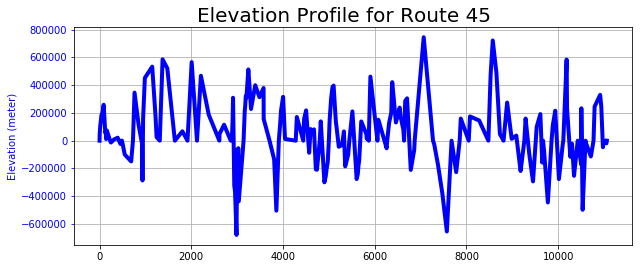

In [10]:
vis.profile_x(ex.raw_batt_power_exert, ex.route_df.cum_distance, route_num)